In [18]:
from qiskit import IBMQ
import sklearn.datasets as skd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from qiskit.aqua.components.optimizers import SPSA
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.aqua.algorithms import QSVM, VQC
from qiskit.providers.ibmq import least_busy
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from sklearn.datasets import make_blobs
import math

In [19]:
# IBMQ.load_account()

In [20]:
# provider = IBMQ.get_provider(hub='ibm-q-research')
# provider.backends()

In [21]:
X,y = make_blobs(n_samples=150, centers=2, n_features=8, random_state=42)

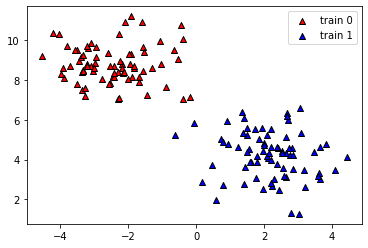

In [22]:
# Data Scatter plot
plt.figure()
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='r', marker='^', edgecolors='k', label="train 0")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='b', marker='^', edgecolors='k', label="train 1")
plt.legend()
plt.show()

In [23]:
import numpy as np
from typing import Callable, List, Optional, Tuple, Union
from math import atan2
def rotate_matrix_nd(bs,degrees):
    ang = np.deg2rad(degrees)
    dim = np.shape(bs)[0]
    Rot_mat = np.eye(dim)
    for k in range(0,dim-2):
        for l in range(dim-1,k,-1):
            a = atan2(bs[l,k],bs[l-1,k])
            R = np.eye(dim)
            R_temp = np.array([[np.cos(a),np.sin(a)],[-1*np.sin(a),np.cos(a)]])
            tmp = l - 1
            R[tmp:tmp+R_temp.shape[0],tmp:tmp+R_temp.shape[0]] = R_temp
            bs=np.matmul(R,bs)
            Rot_mat = np.matmul(R,Rot_mat)
    R = np.eye(dim)
    R[dim-2:dim,dim-2:dim] = np.array([[np.cos(ang),-1*np.sin(ang)],[np.sin(ang),np.cos(ang)]])
    Rot_mat = np.matmul(np.linalg.inv(Rot_mat),np.matmul(R,Rot_mat))
    return Rot_mat
#     Rot_mat = np.linalg.lstsq(Rot_mat,np.matmul(R,Rot_mat))
    
    
#     R = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
#     o = np.atleast_2d(origin)
#     p = np.atleast_2d(points)
#     return np.squeeze((R @ (p.T - o.T) + o.T).T)

In [24]:
# v = np.eye(dim)[:,:-2]
# v[-2][0] = 1
# v[-1][1] = 1
# v

In [25]:
dim = 8
# v = np.logical_or(np.eye(dim),np.fliplr(np.eye(dim))).astype(int)
v = np.eye(dim)[:,:-2]
v[-2][0] = 1
v[-1][1] = 1
rot = rotate_matrix_nd(v,75)

print(rot)

[[ 6.29409523e-01 -4.82962913e-01  6.70331456e-17 -8.07948000e-17
   6.70331456e-17 -8.07948000e-17  3.70590477e-01  4.82962913e-01]
 [ 4.82962913e-01  6.29409523e-01 -6.19960305e-17 -4.25341123e-17
  -6.19960305e-17 -4.25341123e-17 -4.82962913e-01  3.70590477e-01]
 [ 4.25341123e-17  8.07948000e-17  1.00000000e+00  1.30225333e-32
  -8.33695041e-33  1.30225333e-32 -4.25341123e-17 -8.07948000e-17]
 [ 6.19960305e-17 -6.70331456e-17 -7.46456634e-33  1.00000000e+00
  -7.46456634e-33 -8.33695041e-33 -6.19960305e-17  6.70331456e-17]
 [ 4.25341123e-17  8.07948000e-17 -8.33695041e-33  1.30225333e-32
   1.00000000e+00  1.30225333e-32 -4.25341123e-17 -8.07948000e-17]
 [ 6.19960305e-17 -6.70331456e-17 -7.46456634e-33 -8.33695041e-33
  -7.46456634e-33  1.00000000e+00 -6.19960305e-17  6.70331456e-17]
 [ 3.70590477e-01  4.82962913e-01 -6.70331456e-17  8.07948000e-17
  -6.70331456e-17  8.07948000e-17  6.29409523e-01 -4.82962913e-01]
 [-4.82962913e-01  3.70590477e-01  6.19960305e-17  4.25341123e-17
   

In [26]:
XX = np.empty((0,dim))
for point in X:
    tmp_point = np.matmul(rot,np.atleast_2d(point).T)
    tmp_point = np.atleast_2d(tmp_point).T
    XX = np.append(XX, tmp_point,axis=0)
XX    

array([[ -5.52872708,   5.36474325, -10.03449355, ...,  -8.17709711,
          0.44426739,  -7.42741082],
       [ -5.95578906,  12.77005563,   7.71875964, ...,  -7.83565003,
         -6.42162567,   4.0824672 ],
       [ -5.14713258,   3.60022319,  -7.14255813, ...,  -5.02745116,
          1.56691002,  -6.67228646],
       ...,
       [ -6.53482054,  10.85863801,   3.57225841, ...,  -6.36567076,
         -4.55115543,   4.97737887],
       [ -5.21979268,  10.92784893,   4.72646862, ...,  -6.62568875,
         -5.41898416,   4.39409796],
       [ -5.73473619,   9.8551879 ,   5.38717244, ...,  -6.76278221,
         -5.1641193 ,   5.33086872]])

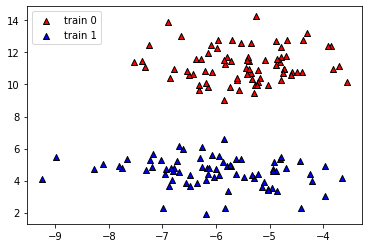

In [27]:
# Data Scatter plot
plt.figure()
plt.scatter(XX[:, 0][y==0], XX[:, 1][y==0], c='r', marker='^', edgecolors='k', label="train 0")
plt.scatter(XX[:, 0][y==1], XX[:, 1][y==1], c='b', marker='^', edgecolors='k', label="train 1")
plt.legend()
plt.show()

In [28]:
sample_train, sample_test, label_train, label_test = train_test_split(XX, y, test_size=0.2,  shuffle=True, random_state=42)

In [29]:
X[0]

array([  2.86294378,   3.50882758, -10.03449355,   7.50865631,
         6.1965465 ,  -8.17709711,  -7.94740348,  -5.57149515])

In [30]:
XX[0]

array([ -5.52872708,   5.36474325, -10.03449355,   7.50865631,
         6.1965465 ,  -8.17709711,   0.44426739,  -7.42741082])

# Quantum SVM - Qiskit

In [57]:
class_labels = [r'A', r'B']#[r'A', r'B']
training_dataset = {key : np.array(sample_train[label_train == k, :])[:] for k, key in enumerate(class_labels)}
test_dataset = {key : np.array(sample_test[label_test == k, :])[:] for k, key in enumerate(class_labels)}

In [58]:
random_seed = 42
feature_dim = 8

In [59]:
# Generate the feature map
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=15)

In [60]:
backend =  BasicAer.get_backend('statevector_simulator')#'statevector_simulator''qasm_simulator'
quantum_instance = QuantumInstance(backend, seed_simulator=random_seed, seed_transpiler=random_seed)

In [61]:
qsvm = QSVM(feature_map = feature_map, training_dataset=training_dataset, test_dataset=test_dataset)

In [62]:
result = qsvm.run(quantum_instance)
# print("testing success ratio: ", result['testing_accuracy'])
print(classification_report(label_test , qsvm.predict(sample_test , quantum_instance)))

              precision    recall  f1-score   support

           0       0.44      0.57      0.50        14
           1       0.50      0.38      0.43        16

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.46        30
weighted avg       0.47      0.47      0.46        30



In [63]:
print(classification_report(np.abs(label_test-1) , qsvm.predict(sample_test , quantum_instance)))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59        16
           1       0.50      0.43      0.46        14

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.52        30
weighted avg       0.53      0.53      0.53        30



# VQC - Qiskit

In [64]:
optimizer = SPSA(maxiter=4, c0=4.0, skip_calibration=True)
var_form = TwoLocal(feature_dim, ['ry'], 'cx', reps=15)

In [65]:
vqc= VQC(optimizer = optimizer,feature_map = feature_map,var_form = var_form, training_dataset=training_dataset, test_dataset=test_dataset,)# Variational 

In [66]:
result = vqc.run(quantum_instance)
# print(f'Testing success ratio: {result["testing_accuracy"]}')

In [67]:
print(classification_report(label_test , vqc.predict(sample_test , quantum_instance)[1]))

              precision    recall  f1-score   support

           0       0.44      0.50      0.47        14
           1       0.50      0.44      0.47        16

    accuracy                           0.47        30
   macro avg       0.47      0.47      0.47        30
weighted avg       0.47      0.47      0.47        30



# Classic SVM

In [68]:
from sklearn import svm

In [69]:
clf = svm.SVC(gamma='scale')
clf.fit(sample_train, label_train)

SVC()

In [70]:
print(classification_report(label_test, clf.predict(sample_test) , zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# VQC - Amplitude Encoding Mottonen Method

In [31]:
import funcs

# Training the model

In [32]:
def nextPowerOf2(n):
    p = 1
    if (n and not(n & (n - 1))):
        return n
    while (p < n) :
        p <<= 1     
    return p;

In [33]:
# padding_X = np.zeros((nextPowerOf2(len(X[0])),1))
X = XX

padding_X = 0.3*np.ones((len(X), nextPowerOf2(len(X[0]))-len(X[0])))

X_pad = np.c_[np.c_[X, padding_X], np.zeros((len(X), 0))]
X_pad
print("First X sample (original)  :", X_pad[0])

# normalize each input
normalization = np.sqrt(np.sum(X**2, -1))
X_norm = (X_pad.T / normalization).T
print("First X sample (normalized):", X_norm[0])

First X sample (original)  : [ -5.52872708   5.36474325 -10.03449355   7.50865631   6.1965465
  -8.17709711   0.44426739  -7.42741082]
First X sample (normalized): [-0.28472725  0.27628214 -0.51677243  0.38669282  0.31911968 -0.42111725
  0.02287959 -0.3825087 ]


In [34]:
# number of qubits
n = 3
num_qubits = n # needed for D&C

# angles for state preparation are new features; impute nans
features = np.array([funcs.get_angles(x, n) for x in X_norm])
features = np.nan_to_num(features)

# divide and conquer
#features = np.array([recursive_compute_beta(x, betas=[]) for x in X_norm])

In [35]:
# set random seed
np.random.seed(0)

# number of samples
num_data = len(y) # 100

# number of training samples
num_train = int(0.75*num_data) # 75

# randomly split into train, validation sets
index = np.random.permutation(range(num_data))
feats_train = features[index[:num_train]]
Y_train = y[index[:num_train]]
feats_val = features[index[num_train:]]
Y_val = y[index[num_train:]]

# We need these later for plotting
X_train = X[index[:num_train]]
X_val = X[index[num_train:]]

In [36]:
# number of parameterized layers
layers = 5 #1
batch_size = 10
iterations = 15

# initial parameters
params_init = np.random.randn(layers, n, 3)*0.01
bias_init = 0.01
learning_rate = 0.01
momentum = 0.9

# set backend to run 
backend = BasicAer.get_backend('qasm_simulator')

# train model
var, bias = funcs.train_model(n, layers, params_init, bias_init, batch_size, learning_rate, momentum, iterations, feats_train, Y_train, feats_val, Y_val, features, y)

Iter:     1 | Loss: 0.0538390 | Acc train: 0.5357143 | Acc validation: 0.3947368 
Iter:     2 | Loss: 0.0509028 | Acc train: 0.5357143 | Acc validation: 0.3947368 
Iter:     3 | Loss: 0.0508224 | Acc train: 0.5357143 | Acc validation: 0.3947368 
Iter:     4 | Loss: 0.0492489 | Acc train: 0.5357143 | Acc validation: 0.3947368 
Iter:     5 | Loss: 0.0481624 | Acc train: 0.5357143 | Acc validation: 0.3947368 
Iter:     6 | Loss: 0.0468275 | Acc train: 0.5357143 | Acc validation: 0.3947368 
Iter:     7 | Loss: 0.0461522 | Acc train: 0.5357143 | Acc validation: 0.3947368 
Iter:     8 | Loss: 0.0444704 | Acc train: 0.5357143 | Acc validation: 0.3947368 
Iter:     9 | Loss: 0.0451262 | Acc train: 0.5357143 | Acc validation: 0.3947368 


KeyboardInterrupt: 